In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 设置基本的图表样式
plt.rcParams['figure.figsize'] = [12, 6]  # 设置默认图表大小
plt.rcParams['axes.grid'] = True  # 启用网格
plt.rcParams['grid.alpha'] = 0.3  # 设置网格透明度

# 读取数据
df = pd.read_csv('MSTuring-30M/access_counts_snapshot_step_300.csv')

# 基础统计信息
print(f"总向量数量: {len(df):,}")
print(f"总访问次数: {df['access_count'].sum():,}")
print(f"平均访问次数: {df['access_count'].mean():.2f}")
print(f"访问次数中位数: {df['access_count'].median()}")
print(f"零访问向量数量: {len(df[df['access_count'] == 0]):,}")

总向量数量: 2,004,800
总访问次数: 73,761,315
平均访问次数: 36.79
访问次数中位数: 33.0
零访问向量数量: 228


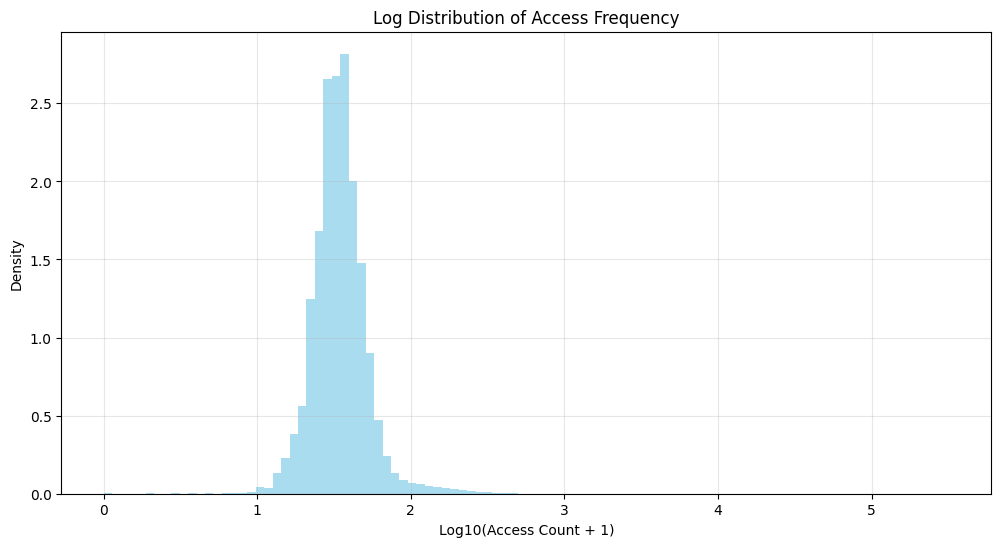

In [6]:
plt.figure()
plt.hist(np.log10(df['access_count'] + 1), bins=100, 
         color='skyblue', alpha=0.7, density=True)
plt.title('Log Distribution of Access Frequency')
plt.xlabel('Log10(Access Count + 1)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.show()

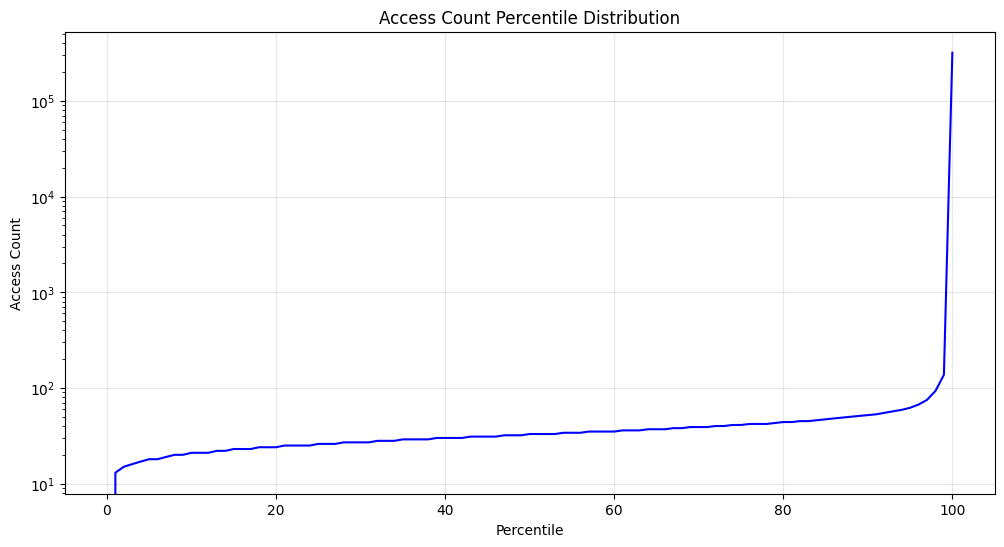

50th percentile access count: 33.0
75th percentile access count: 41.0
90th percentile access count: 52.0
95th percentile access count: 62.0
99th percentile access count: 137.0


In [7]:
plt.figure()
percentiles = np.arange(0, 101, 1)
access_percentiles = np.percentile(df['access_count'], percentiles)
plt.plot(percentiles, access_percentiles, 'b-')
plt.title('Access Count Percentile Distribution')
plt.xlabel('Percentile')
plt.ylabel('Access Count')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

# Print key percentiles
key_percentiles = [50, 75, 90, 95, 99]
for p in key_percentiles:
    value = np.percentile(df['access_count'], p)
    print(f"{p}th percentile access count: {value:.1f}")

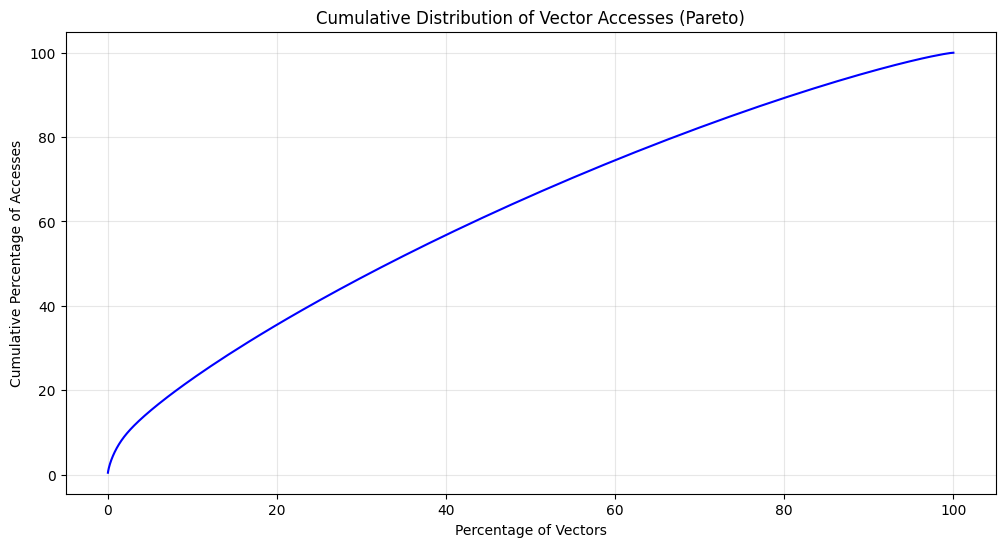

50% of accesses are from 664,875 vectors (33.16% of total)
80% of accesses are from 1,342,501 vectors (66.96% of total)
90% of accesses are from 1,625,721 vectors (81.09% of total)
95% of accesses are from 1,789,616 vectors (89.27% of total)
99% of accesses are from 1,947,217 vectors (97.13% of total)


In [8]:
total_accesses = df['access_count'].sum()
df_sorted = df.sort_values('access_count', ascending=False).copy()
df_sorted['cumulative_access'] = df_sorted['access_count'].cumsum()
df_sorted['access_percentage'] = df_sorted['cumulative_access'] / total_accesses * 100

plt.figure()
plt.plot(np.arange(len(df_sorted)) / len(df_sorted) * 100, 
         df_sorted['access_percentage'], 'b-')
plt.title('Cumulative Distribution of Vector Accesses (Pareto)')
plt.xlabel('Percentage of Vectors')
plt.ylabel('Cumulative Percentage of Accesses')
plt.grid(True, alpha=0.3)
plt.show()

# Analyze key coverage points
coverage_points = [50, 80, 90, 95, 99]
for p in coverage_points:
    vectors_needed = len(df_sorted[df_sorted['access_percentage'] <= p])
    print(f"{p}% of accesses are from {vectors_needed:,} vectors "
          f"({vectors_needed/len(df)*100:.2f}% of total)")

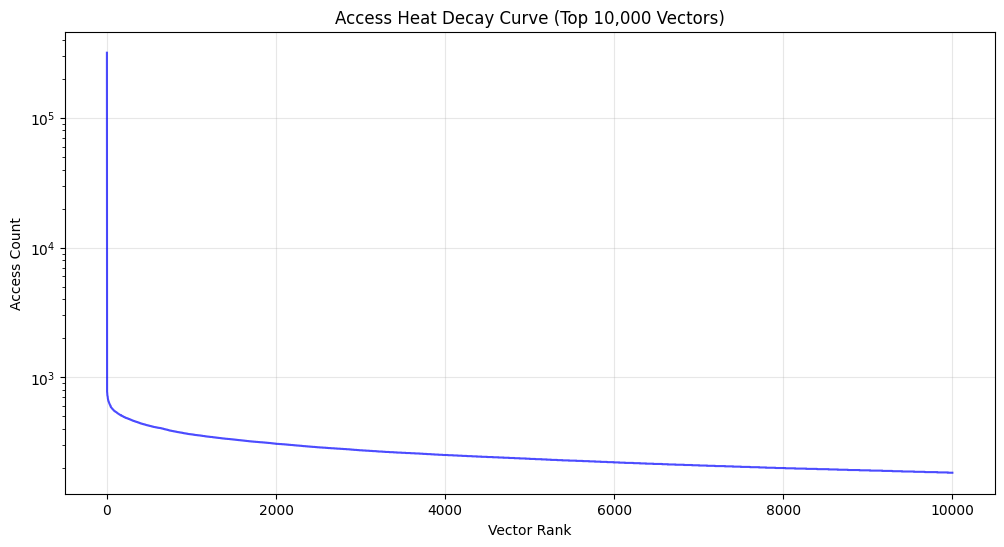

Top 100 vectors account for 0.51% of total accesses
Top 1,000 vectors account for 1.03% of total accesses
Top 10,000 vectors account for 3.96% of total accesses


In [9]:
top_n = min(10000, len(df))
plt.figure()
plt.plot(range(top_n), 
         df_sorted['access_count'].head(top_n), 
         'b-', alpha=0.7)
plt.title(f'Access Heat Decay Curve (Top {top_n:,} Vectors)')
plt.xlabel('Vector Rank')
plt.ylabel('Access Count')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

# Print Top-N statistics
for n in [100, 1000, 10000]:
    if n <= len(df):
        top_n_accesses = df_sorted['access_count'].head(n).sum()
        percentage = top_n_accesses / total_accesses * 100
        print(f"Top {n:,} vectors account for {percentage:.2f}% of total accesses")

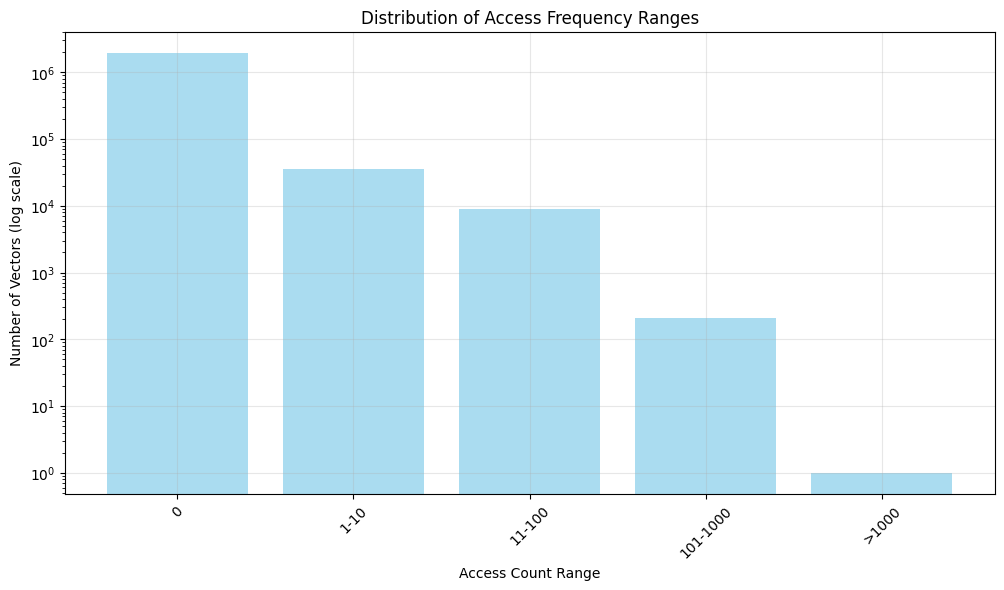

Vectors with 11-100 accesses: 1,960,071 (97.77%)
Vectors with 101-1000 accesses: 35,395 (1.77%)
Vectors with 1-10 accesses: 8,898 (0.44%)
Vectors with 0 accesses: 207 (0.01%)
Vectors with >1000 accesses: 1 (0.00%)


In [2]:
ranges = [0, 1, 10, 100, 1000, float('inf')]
labels = ['0', '1-10', '11-100', '101-1000', '>1000']
counts = pd.cut(df['access_count'], bins=ranges, labels=labels).value_counts()

plt.figure()
plt.bar(range(len(counts)), counts, alpha=0.7, color='skyblue')
plt.title('Distribution of Access Frequency Ranges')
plt.xlabel('Access Count Range')
plt.ylabel('Number of Vectors (log scale)')
plt.yscale('log')
plt.xticks(range(len(counts)), labels, rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# Print detailed statistics
for label, count in counts.items():
    print(f"Vectors with {label} accesses: {count:,} ({count/len(df)*100:.2f}%)")

Square side length: 1416
Non-zero elements: 2004571
Max access count: 776.00
Mean access count: 36.63
Median of non-zero counts: 33.00


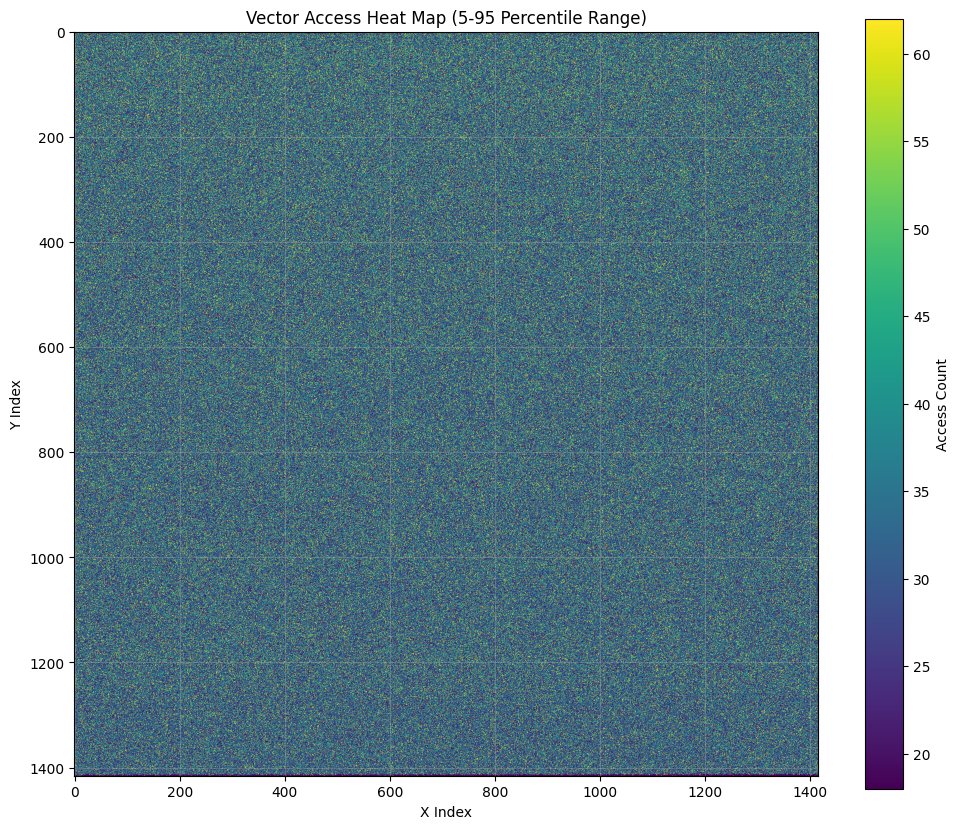

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 将索引0的值设为0
access_counts = df['access_count'].values
access_counts[0] = 0

# 计算合适的边长（向上取整到最接近的整数）
side_length = int(np.ceil(np.sqrt(len(access_counts))))
print(f"Square side length: {side_length}")

# 填充数组至完整的方形
square_size = side_length * side_length
padded_data = np.zeros(square_size)
padded_data[:len(access_counts)] = access_counts

# 重塑为方形矩阵
matrix = padded_data.reshape(side_length, side_length)

# 添加一些统计信息
print(f"Non-zero elements: {np.count_nonzero(matrix)}")
print(f"Max access count: {matrix.max():.2f}")
print(f"Mean access count: {matrix.mean():.2f}")
print(f"Median of non-zero counts: {np.median(matrix[matrix > 0]):.2f}")

vmin = np.percentile(matrix[matrix > 0], 5)  # 第5百分位
vmax = np.percentile(matrix[matrix > 0], 95)  # 第95百分位

plt.figure(figsize=(12, 10))
im = plt.imshow(matrix, cmap='viridis', aspect='equal', vmin=vmin, vmax=vmax)
plt.colorbar(im, label='Access Count')
plt.title('Vector Access Heat Map (5-95 Percentile Range)')
plt.xlabel('X Index')
plt.ylabel('Y Index')
plt.show()

Square side length: 45
1%分位数: 34375.64
99%分位数: 39009.48
被排除的低值数量: 41
被排除的高值数量: 21


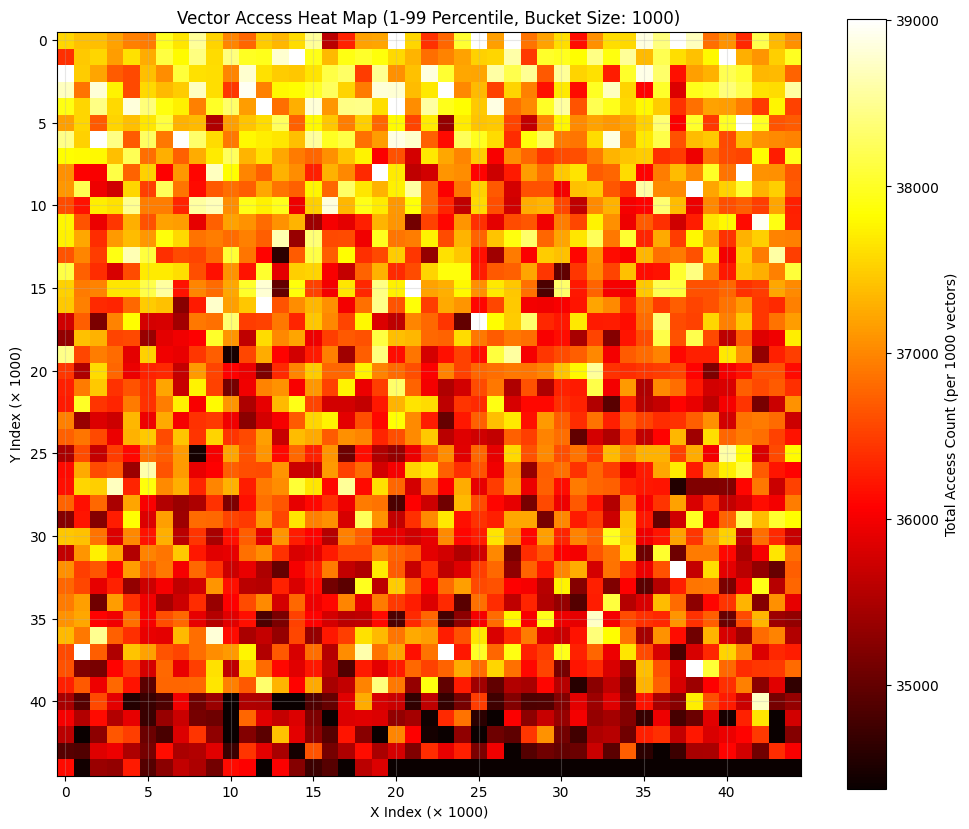

In [29]:
# 将索引0的值设为0
access_counts = df['access_count'].values
# access_counts[0] = 0

# 设置桶大小和处理数据
bucket_size = 1000
n = len(access_counts)
num_buckets = n // bucket_size + (1 if n % bucket_size else 0)

# 创建桶并计算每个桶的总访问次数
bucketed_data = np.zeros(num_buckets)
for i in range(num_buckets):
    start_idx = i * bucket_size
    end_idx = min(start_idx + bucket_size, n)
    bucketed_data[i] = np.sum(access_counts[start_idx:end_idx])

# 计算方形边长
side_length = int(np.ceil(np.sqrt(len(bucketed_data))))
print(f"Square side length: {side_length}")

# 填充到方形
square_size = side_length * side_length
padded_data = np.zeros(square_size)
padded_data[:len(bucketed_data)] = bucketed_data

# 重塑为方形矩阵
matrix = padded_data.reshape(side_length, side_length)

# 使用百分位数来设置颜色范围
vmin = np.percentile(matrix[matrix > 0], 1)
vmax = np.percentile(matrix[matrix > 0], 99)
print(f"1%分位数: {vmin}")
print(f"99%分位数: {vmax}")
print(f"被排除的低值数量: {np.sum(matrix < vmin)}")
print(f"被排除的高值数量: {np.sum(matrix > vmax)}")

plt.figure(figsize=(12, 10))
im = plt.imshow(matrix, cmap='hot', aspect='equal', vmin=vmin, vmax=vmax)
plt.colorbar(im, label=f'Total Access Count (per {bucket_size} vectors)')
plt.title(f'Vector Access Heat Map (1-99 Percentile, Bucket Size: {bucket_size})')
plt.xlabel('X Index (× {})'.format(bucket_size))
plt.ylabel('Y Index (× {})'.format(bucket_size))
plt.show()

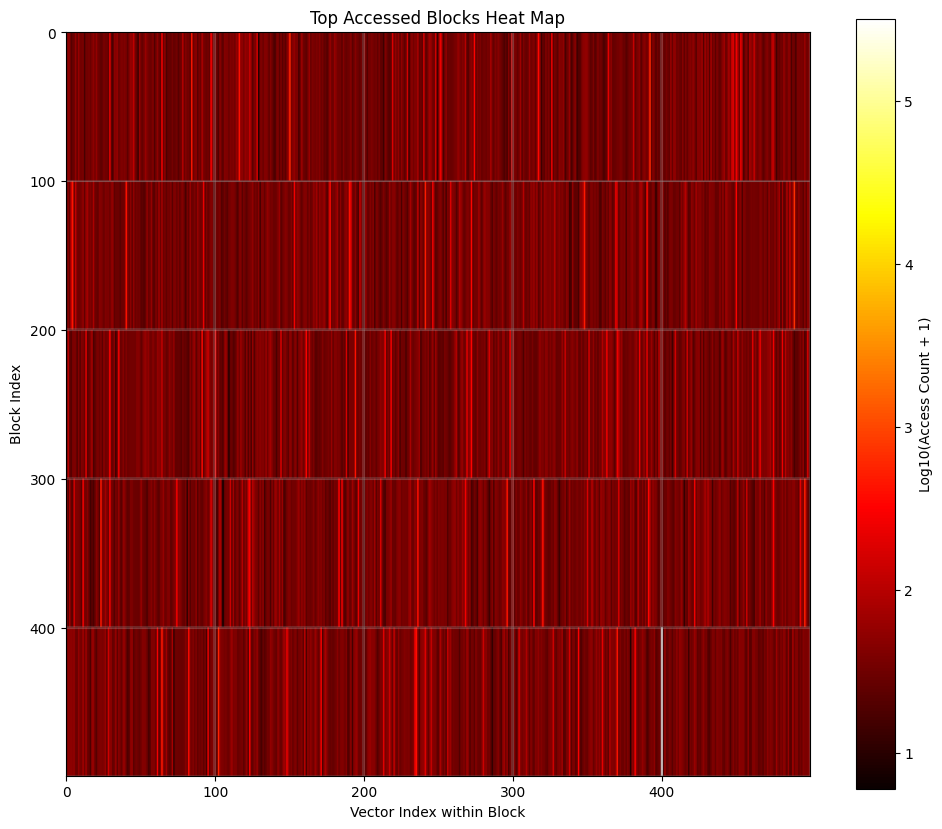

In [5]:
# 分块热力图
block_size = 100  # 可以调整块大小
n = len(access_counts)
num_blocks = n // block_size
block_sums = np.array([
    np.sum(access_counts[i*block_size:(i+1)*block_size]) 
    for i in range(num_blocks)
])

# 选择top K个最热的块
top_k = 25  # 5x5网格
top_blocks_idx = np.argsort(block_sums)[-top_k:]

# 创建热力图矩阵
grid_size = int(np.ceil(np.sqrt(top_k)))
matrix = np.zeros((grid_size * block_size, grid_size * block_size))

for i, block_idx in enumerate(top_blocks_idx):
    row = (i // grid_size) * block_size
    col = (i % grid_size) * block_size
    block_data = access_counts[block_idx*block_size:(block_idx+1)*block_size]
    matrix[row:row+block_size, col:col+len(block_data)] = block_data

plt.figure(figsize=(12, 10))
im = plt.imshow(np.log10(matrix + 1), cmap='hot')
plt.colorbar(im, label='Log10(Access Count + 1)')
plt.title('Top Accessed Blocks Heat Map')
plt.xlabel('Vector Index within Block')
plt.ylabel('Block Index')

# 添加网格线显示块的边界
for i in range(grid_size+1):
    plt.axhline(y=i*block_size-0.5, color='gray', linestyle='-', alpha=0.3)
    plt.axvline(x=i*block_size-0.5, color='gray', linestyle='-', alpha=0.3)

plt.show()